In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix


In [164]:
data=pd.read_csv(r'C:\Users\veluk\Downloads\archive (2)\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [165]:
#Check if there are any missing values in dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [166]:
# Columns where value can't be 0
invalid_zero_cols = ['BloodPressure', 'SkinThickness', 'BMI', 'Insulin', 'Glucose']

# Count how many zeros are in each of those columns
zero_counts = (data[invalid_zero_cols] == 0).sum()
zero_counts

BloodPressure     35
SkinThickness    227
BMI               11
Insulin          374
Glucose            5
dtype: int64

## We can see that the percentage of 0 values in SkinThickness and Insulin is too big so let's replace them by median

In [167]:
import warnings 
warnings.filterwarnings('ignore')
# Replace 0s with NaN in all relevant columns
data[invalid_zero_cols]=data[invalid_zero_cols].replace(0,np.nan)

# Impute with median
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace=True)

## Now there are only few rows where there are some missing values so let's drop them


In [168]:
data.dropna(subset=invalid_zero_cols, inplace=True)
data[invalid_zero_cols]

,BloodPressure,SkinThickness,BMI,Insulin,Glucose
0,72.0,35.00000,33.6,155.548223,148.0
1,66.0,29.00000,26.6,155.548223,85.0
2,64.0,29.15342,23.3,155.548223,183.0
3,66.0,23.00000,28.1,94.000000,89.0
4,40.0,35.00000,43.1,168.000000,137.0
...,...,...,...,...,...
763,76.0,48.00000,32.9,180.000000,101.0
764,70.0,27.00000,36.8,155.548223,122.0
765,72.0,23.00000,26.2,112.000000,121.0
766,60.0,29.15342,30.1,155.548223,126.0


In [169]:
# Count how many Null are in each of those columns
print('How many Null are there: \n',data[invalid_zero_cols].isna().sum())
print()

# Count how many zeros are in each of those columns
print('How many Zeros are there: \n',(data[invalid_zero_cols] == 0).sum())

How many Null are there: 
 BloodPressure    0
SkinThickness    0
BMI              0
Insulin          0
Glucose          0
dtype: int64

How many Zeros are there: 
 BloodPressure    0
SkinThickness    0
BMI              0
Insulin          0
Glucose          0
dtype: int64


## Finally let's make sure that there are no values equal to 0 or Nan

## Now we can visualize the distribution for each feature

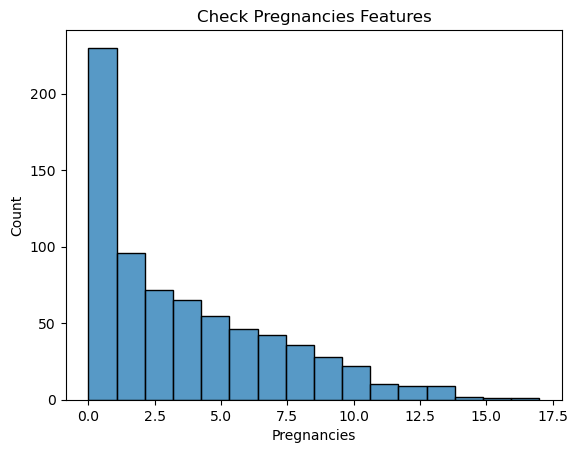

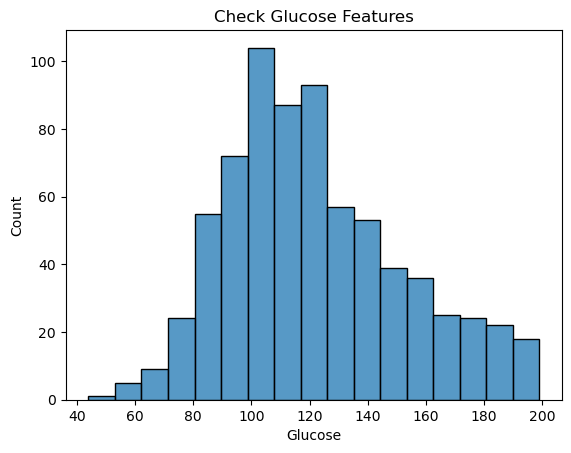

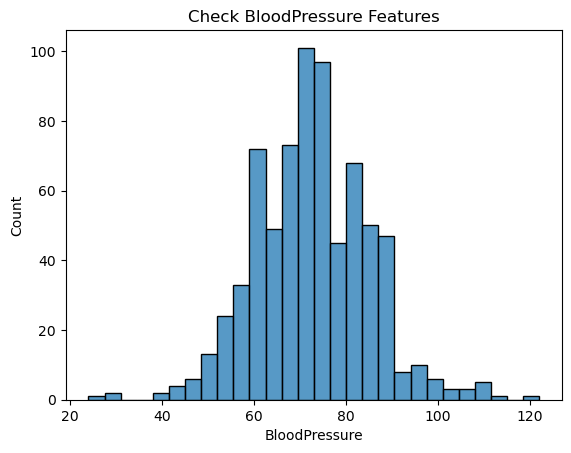

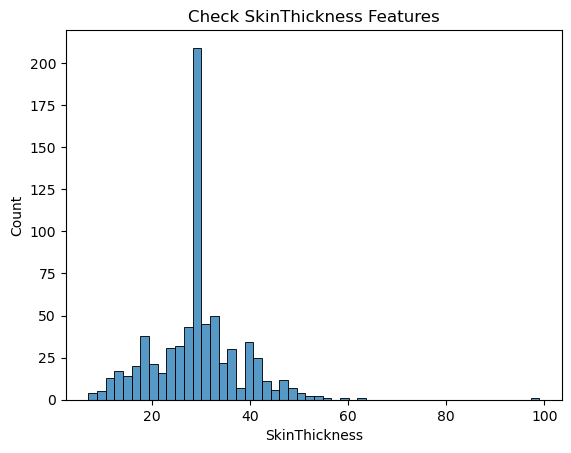

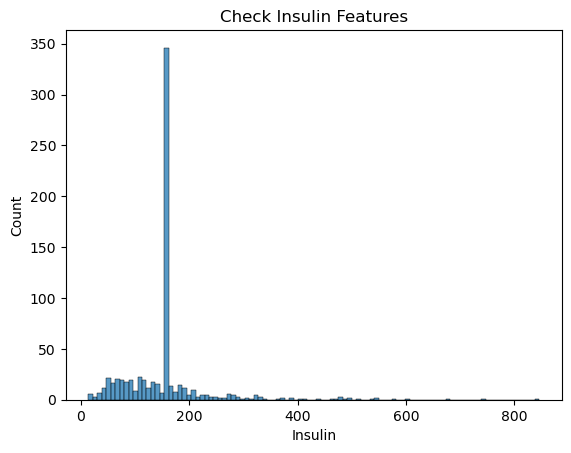

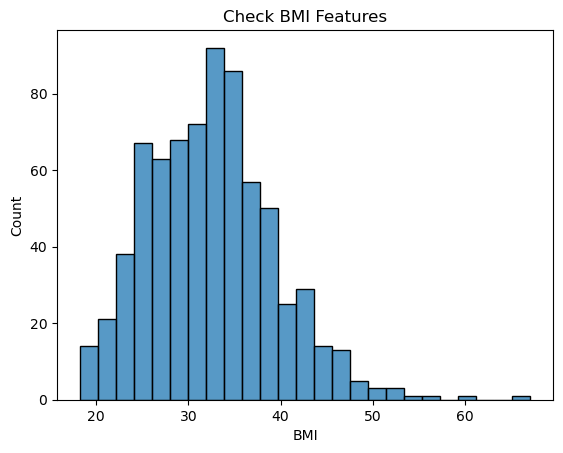

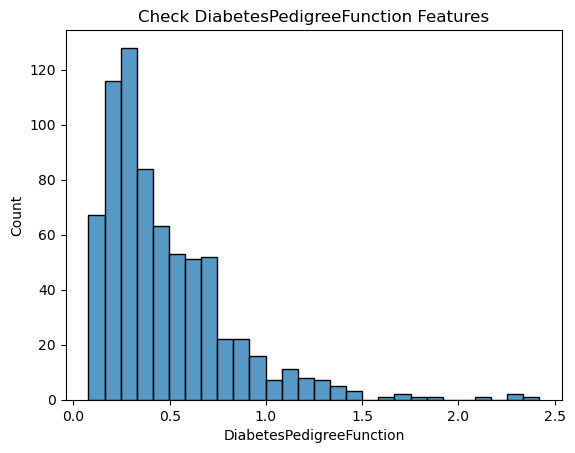

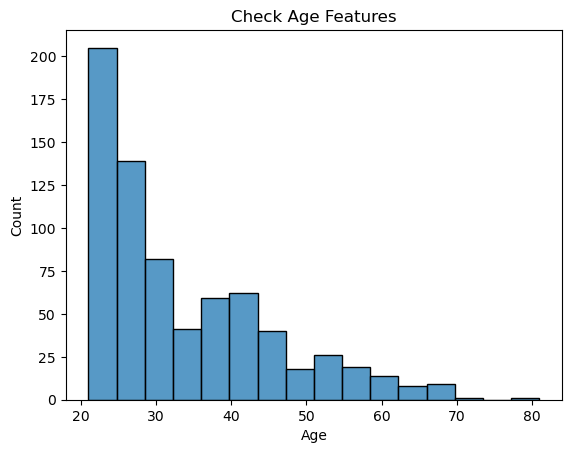

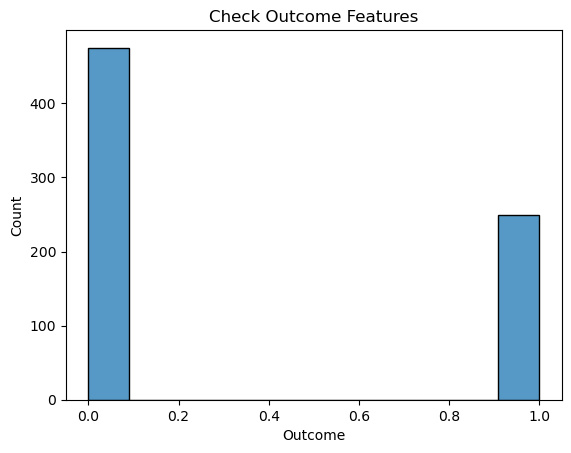

In [170]:
#Visualizing the distribution for each feature
for i in data:
    sns.histplot(data=data,x=i)
    plt.title(f'Check {i} Features')
    plt.show()

## Let's build a Random Forest model now

In [171]:
# Firstly let's split the data

x=data.drop('Outcome',axis =1)
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [172]:
# There is no need to apply feature scaling or encoding so we can proceed to building a model
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

Accuracy Score : 82.75862068965517
confusion_matrix  :
 [[89 13]
 [12 31]]


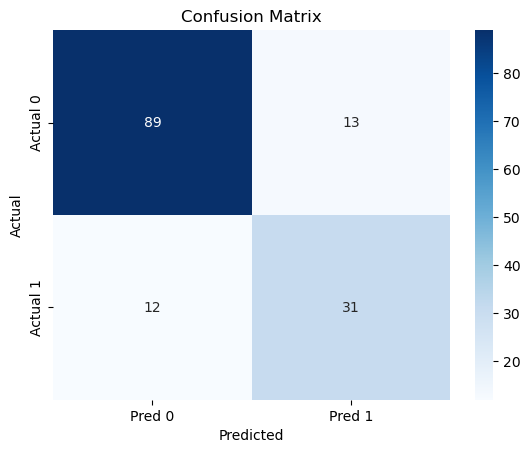

In [173]:
# Printing accuracy score and confusion matrix

print('Accuracy Score :' ,accuracy_score(y_test,y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix  :\n',cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Pred 0', 'Pred 1'],yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Let's build a XGBoostmodel now


In [174]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
Y_pred=model.predict(x_test)
Y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

Accuracy Score: 79.0
confusion_matrix :
 [[86 16]
 [14 29]]


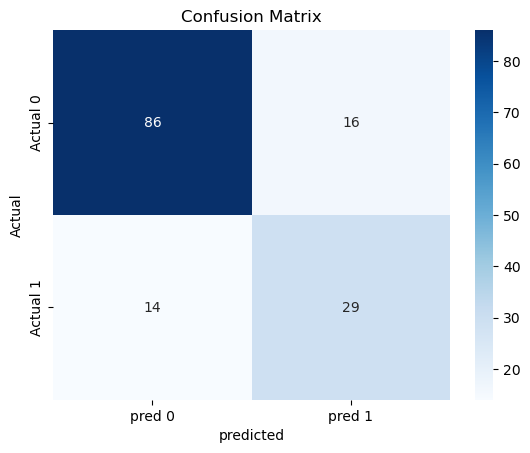

In [175]:
print('Accuracy Score:',np.round(accuracy_score(y_test,Y_pred)*100))

cm=confusion_matrix(y_test,Y_pred)
print('confusion_matrix :\n',cm)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',xticklabels=['pred 0','pred 1'],yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()


##  Build the Neural Network Model Using PyTorch


In [176]:
# StandardScalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [177]:
# Import models
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader


In [178]:
# Convert to PyTorch tensors
x_train_tensor=torch.tensor(x_train,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train.values,dtype=torch.float32)
x_test_tensor=torch.tensor(x_test,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test.values,dtype=torch.float32)

In [179]:
# Create DataLoader
train_ds=TensorDataset(x_train_tensor,y_train_tensor)
train_dl=DataLoader(train_ds,batch_size=32,shuffle=True)

In [180]:
# Define the neural network
class DiabetesNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

# Train the Model
model = DiabetesNN()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for i in range(100):
    for xb,yb in train_dl:
        y_pred=model(xb).squeeze()
        loss=loss_fn(y_pred,yb)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if i % 10 == 0:
        print(f"Epoch{i} Loss:{loss.item():.4f}")

Epoch0 Loss:0.6977
Epoch10 Loss:0.5105
Epoch20 Loss:0.6726
Epoch30 Loss:0.3780
Epoch40 Loss:0.4592
Epoch50 Loss:0.8095
Epoch60 Loss:0.8046
Epoch70 Loss:0.5007
Epoch80 Loss:1.1458
Epoch90 Loss:0.3165


Accuracy: 76.0
Confusion:
 [[84 18]
 [17 26]]


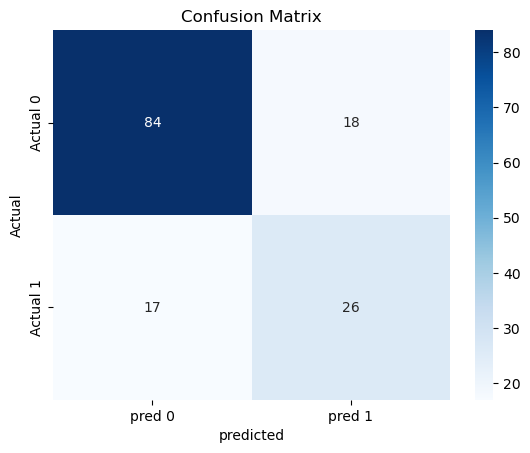

In [181]:
#Evaluate Accuracy & Confusion Matrix
with torch.no_grad():
    y_test_pred=model(x_test_tensor).squeeze()
    y_test_pred_label=(y_test_pred>0.5).int()

ac=accuracy_score(y_test_tensor,y_test_pred_label)
cm=confusion_matrix(y_test_tensor,y_test_pred_label)
print('Accuracy:',np.round(ac,2)*100)
print('Confusion:\n',cm)


sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',xticklabels=['pred 0','pred 1'],yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()